In [39]:
import billboard
from datetime import timedelta, date
import time

d = {}

def daterange(start_date, end_date):
    for n in range(int ((end_date - start_date).days)):
        yield start_date + timedelta(n)

start_date = date(2015, 1, 1)
end_date = date(2016, 7, 1)
fileSong = open("Song.txt", "x")
for single_date in daterange(start_date, end_date):
    if single_date.weekday() == 0:
        day = single_date.strftime("%Y-%m-%d")
        
        while True:
            try:
                chart = billboard.ChartData('hot-100', date=day)
                #chart2 = billboard.ChartData('artist-100', date=day)
                break
            except:
                print('waiting 60 sec...')
                time.sleep(60)
        
        #print(type(chart))
        #print(chart)
        #fileArtist = open(day+"Artist.txt", "x")
        
        for s in chart:
            fileSong = open("Song.txt", "a")
            fileSong.write(s.title + ": " + s.artist + "\n")

FileExistsError: [Errno 17] File exists: 'Song.txt'

In [2]:
file = open("Song.txt", "r")
artistsongs = {}

#this is a for loop going through each line and mapping the artist to the number of songs it has on the list
x = 0
for line in file:
    line = line.strip()
    larr = line.split(":")
    #print(larr)
    art = larr[1]
    
    art = art[1:]
    if 'featuring' in art.lower():
        index = art.lower().find('featuring')
        art = art[:index-1]
        art.strip()
    song = larr[0]
    if art not in artistsongs:
        artistsongs[art] = set()
    artistsongs[art].add(song)
    x+=1
print(len(artistsongs))  
print(x)
print(artistsongs['Drake'])


797
25397
{'Madiba Riddim', 'Omerta', 'Hotline Bling', 'Ratchet Happy Birthday', "That's How You Feel", 'Controlla', "Sneakin'", 'Peak', 'Ice Melts', 'Used To', 'Back To Back', 'Nice For What', "Don't Matter To Me", 'Pop Style', 'Elevate', 'Since Way Back', 'Keep The Family Close', 'Still Here', 'How About Now', 'Legend', 'Fake Love', 'Blem', 'Finesse', 'Emotionless', 'After Dark', 'Survival', 'Behind Barz', 'Gyalchester', 'Talk Up', 'Charged Up', 'Get It Together', 'Two Birds, One Stone', 'Jorja Interlude', 'Diplomatic Immunity', '10 Bands', 'Dreams Money Can Buy', 'Mob Ties', 'With You', 'The Motion', 'Skepta Interlude', 'Fire & Desire', 'In My Feelings', 'Is There More', "God's Plan", '8 Out Of 10', 'Signs', 'Too Good', 'March 14', 'Weston Road Flows', 'Trust Issues', 'Redemption', 'Money In The Grave', 'Do Not Disturb', 'Final Fantasy', 'Free Smoke', 'KMT', 'Summer Games', '6 Man', 'Hype', 'Summer Sixteen', 'Now & Forever', "No Tellin'", 'Preach', 'Jaded', 'Nonstop', 'U With Me?', 

In [3]:
songs = []
for k in artistsongs:
    songs.append(artistsongs[k])
print(len(songs))
print(songs)


797
[{'Out Of The Woods', "It's Nice To Have A Friend", 'End Game', 'New Romantics', 'Wonderland', 'Wildest Dreams', 'Blank Space', 'Delicate', 'Style', 'The Man', 'Bad Blood', 'False God', "Soon You'll Get Better", '...Ready For It?', 'Miss Americana & The Heartbreak Prince', 'Afterglow', 'London Boy', 'Gorgeous', 'You Are In Love', 'ME!', 'Shake It Off', 'Look What You Made Me Do', 'Death By A Thousand Cuts', 'Call It What You Want', 'I Think He Knows', 'The Archer', 'Lover', 'Paper Rings', 'Cornelia Street', 'You Need To Calm Down', 'Daylight', 'Cruel Summer', 'I Forgot That You Existed'}, {'Nothing Breaks Like A Heart', 'Uptown Funk!'}, {'Take Me To Church'}, {"Like I'm Gonna Lose You", 'All About That Bass', 'No Excuses', 'No', 'Dear Future Husband', 'Title', 'Me Too', 'Lips Are Movin'}, {"Writing's On The Wall", "I'm Not The Only One", 'How Do You Sleep?', 'Lay Me Down', 'Pray', 'Too Good At Goodbyes', 'Like I Can', 'Stay With Me'}, {'Perfect', 'Best Part Of Me', 'South Of The Bo

[('Drake', 94), ('Post Malone', 39), ('The Weeknd', 37), ('Meek Mill', 36), ('Future', 36), ('Taylor Swift', 33), ('Ariana Grande', 30), ('Kanye West', 30), ('J. Cole', 29), ('XXXTENTACION', 26), ('Kendrick Lamar', 24), ('Travis Scott', 22), ('Lil Wayne', 22), ('Ed Sheeran', 21), ('DJ Khaled', 20)]
<class 'list'>


Text(0.5, 1.0, 'Artist With Most Unique Songs in Top 100')

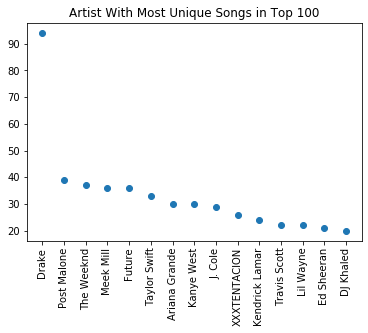

In [7]:
#sorts the artists by the number of songs they have had on the top 100 set
import operator
import matplotlib.pyplot as plt 
import numpy as np
artistnum = {}
for k in artistsongs:
    artistnum[k] = len(artistsongs[k])

numsort = sorted(artistnum.items(), key=operator.itemgetter(1), reverse = True)
top10artists = numsort[:15]
print(top10artists)
print(type(top10artists))

nums = []
arts = []
for artist in top10artists:
    nums.append(artist[1])
    arts.append(artist[0])

plt.scatter(arts, nums)
plt.xticks(rotation=90)
plt.title("Artist With Most Unique Songs in Top 100")

[('Perfect', 75), ('Worth It', 61), ('Sorry', 61), ('Unforgettable', 60), ('Sugar', 57), ('Shape Of You', 57), ('Happier', 54), ('Sunflower (Spider-Man', 53), ('Trap Queen', 52), ('See You Again', 52), ('Stitches', 52), ('Closer', 52), ('Mercy', 52), ("Say You Won't Let Go", 52), ('Better Now', 52), ('Girls Like You', 52), ('High Hopes', 52), ('Eastside', 52), ('Sicko Mode', 52), ('Without Me', 52)]


Text(0.5, 1.0, 'Number of Time Song Appeared on Top 100 List')

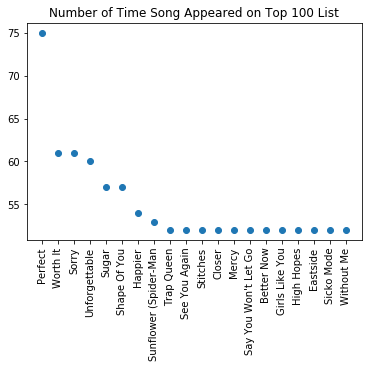

In [8]:
#goes through and creates a dictionary with the number of times the song has been on the top 100
import numpy as np
import matplotlib.pyplot as plt
file = open("Song.txt", "r")
songnum = {}
for line in file:
    line = line.strip()
    larr = line.split(":")
    song = larr[0]
    if song not in songnum:
        songnum[song] = 0
    songnum[song] += 1
songsort = sorted(songnum.items(), key=operator.itemgetter(1), reverse = True)
top10 = songsort[:20]
print(top10)

times = []
so = []
for n in top10:
    times.append(n[1])
    so.append(n[0])

plt.scatter(so, times)
plt.xticks(rotation=90)
plt.title("Number of Time Song Appeared on Top 100 List")

In [69]:
import lyricwikia

def get_lyrics(artist, song):
    try:
        lyrics = lyricwikia.get_lyrics(artist, song)
        return (lyrics)
    except Exception as e:
        return "nope"
   


In [52]:
import re
import nltk

# Get a list of stopwords from nltk
stopwords = nltk.corpus.stopwords.words("english")

def get_clean_words(lyrics):
    def _isnum(w):
        try:
            int(w)
            return True
        except ValueError:
            return False
        
    # Remove table and external links
    markup_text = re.sub(r'\{\{[\s\S]*?\}\}', '', lyrics)

    # Remove category links
    markup_text = re.sub(r'\[\[Category.+\]\]', '', markup_text)

    # Set words to lowercase and remove them if they are stop words
    words = [w.lower() for w in re.findall('\w+', markup_text) if w.lower() not in stopwords]

    # Remove numbers
    wordswoutnums = [w for w in words if not _isnum(w)]
    
    #remove br
    words = []
    for w in wordswoutnums:
        if w != 'br':
            words.append(w)
        
            
        

    return words

In [76]:
topfivesongtup = songsort[:500]
topfivesonglist = []
for tp in topfivesongtup:
    topfivesonglist.append(tp[0])
#print(topfivesong)
dum = []
for art in artistsongs:
    sofart = artistsongs[art]
    #print(sofart)
    for s in sofart:
        #print(s)
        #print(type(s))
        if s in topfivesonglist:
            #print(s)
            #print(art)
            dum.append(tuple([art, s]))
#print(dum)

In [72]:
songs = []
dwords = {}
dlen = {}
wordset = set()
for item in dum:
    artist = item[0]
    song = item[1]
    lyrics = get_lyrics(artist, song)
   # print(lyrics)
    cleanwords = get_clean_words(lyrics)
   # print(cleanwords)
    if not (len(cleanwords) == 1 and 'nope' in cleanwords):
            songs.append(item)
            #print(cleanwords)
            for cw in cleanwords:
                wordset.add(cw)
            dwords[item] = cleanwords
            dlen[item] = len(cleanwords)
wordset = sorted(wordset)
print(len(wordset))
#print(dwords)
    

7430


In [73]:
matrix = []
for song in songs:
    vec = [0] * len(wordset)
    cleanwords = dwords[song]
    for w in wordset:
        if w in cleanwords:
            vec[wordset.index(w)] += 1
    matrix.append(vec)
print(np.array(matrix))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [74]:
lol = np.array(matrix)

TF = lol / lol.sum(1).reshape(-1, 1)

rows = lol.shape[0]
TFIDF = TF * np.log(rows / ((lol > 0).sum(0)))
TFIDF

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [85]:
dsorted = sorted(dlen.items(), key = operator.itemgetter(1), reverse = True)
#print(dsorted)
topbunch = dsorted[:3]
print(topbunch)
song1 = topbunch[0][0]
song2 = topbunch[1][0]
song3 = topbunch[2][0]




[(('Migos', 'Bad And Boujee'), 687), (('Migos', 'Walk It Talk It'), 645), (('DJ Khaled', "I'm The One"), 535)]


[(0.021459270615729945, 'wakin'), (0.021459270615729945, 'usual'), (0.021459270615729945, 'subway'), (0.021459270615729945, 'snakin'), (0.021459270615729945, 'slutty'), (0.021459270615729945, 'segway'), (0.021459270615729945, 'secluded'), (0.021459270615729945, 'ruthless'), (0.021459270615729945, 'rrrah'), (0.021459270615729945, 'rate')]


Text(0.5, 1.0, 'Migos Bad And Boujee: Important Words')

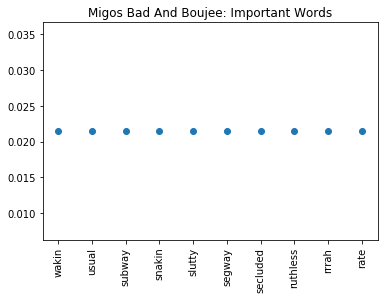

In [86]:
song1index1 = songs.index(song1)
song1index = np.where(songs == song1)
song1blah = sorted(list(zip(TFIDF[song1index1], wordset)), reverse = True)[:10]
print(song1blah)
words1 = []
nums1 = []
for n in song1blah:
    words1.append(n[1])
    nums1.append(n[0])
plt.scatter(words1, nums1)
plt.xticks(rotation=90)
plt.title(song1[0] + " " + song1[1] + ": Important Words")

[(0.03027669369051007, 'walkie'), (0.03027669369051007, 'vault'), (0.03027669369051007, 'teriyaki'), (0.03027669369051007, 'talkie'), (0.03027669369051007, 'spalding'), (0.03027669369051007, 'sopranos'), (0.03027669369051007, 'socket'), (0.03027669369051007, 'scoliosis'), (0.03027669369051007, 'scientist'), (0.03027669369051007, 'santo')]


Text(0.5, 1.0, 'Migos Walk It Talk It: Important Words')

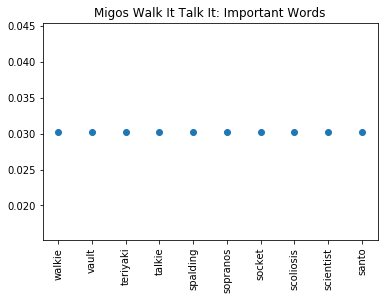

In [87]:
song2index2 = songs.index(song2)
song2index = np.where(songs == song2)
song2blah = sorted(list(zip(TFIDF[song2index2], wordset)), reverse = True)[:10]
print(song2blah)
words2 = []
nums2 = []
for n in song2blah:
    words2.append(n[1])
    nums2.append(n[0])
plt.scatter(words2, nums2)
plt.xticks(rotation=90)
plt.title(song2[0] + " " + song2[1] + ": Important Words")

[(0.03662210853582656, 'whitney'), (0.03662210853582656, 'response'), (0.03662210853582656, 'prr'), (0.03662210853582656, 'justin'), (0.03662210853582656, 'intimidate'), (0.03662210853582656, 'imitators'), (0.03662210853582656, 'hopscotch'), (0.03662210853582656, 'guilderberg'), (0.03662210853582656, 'finessin'), (0.03662210853582656, 'essence')]


Text(0.5, 1.0, "DJ Khaled I'm The One: Important Words")

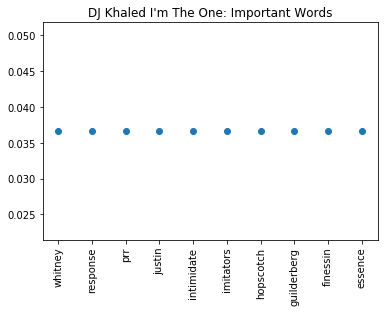

In [89]:
song3index3 = songs.index(song3)
song3index = np.where(songs == song3)
song3blah = sorted(list(zip(TFIDF[song3index3], wordset)), reverse = True)[:10]
print(song3blah)
words3 = []
nums3 = []
for n in song3blah:
    words3.append(n[1])
    nums3.append(n[0])
plt.scatter(words3, nums3)
plt.xticks(rotation=90)
plt.title(song3[0] + " " + song3[1] + ": Important Words")